In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## (1) Apply the following spatial filters to the image and compare the results by plotting the images side-by-side

In [12]:
# Load an image
image = cv.imread("moon.jpg", 0)
assert image is not None

### (a) Box filter

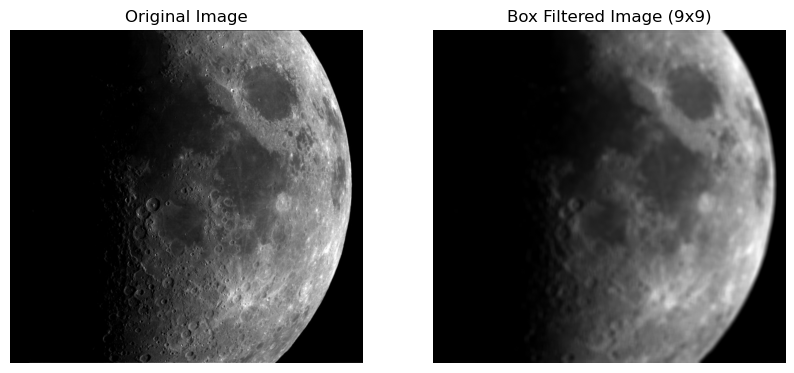

In [13]:
# Apply a box filter
box_filtered = cv.boxFilter(image, ddepth=-1, ksize=(9, 9), normalize=True)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(box_filtered, cmap='gray')
plt.title("Box Filtered Image (9x9)")
plt.axis("off")

plt.show()

Effect: The filtered image looks a bit blurry version of the original image with squarish artifacts.

(b) Gaussian filter

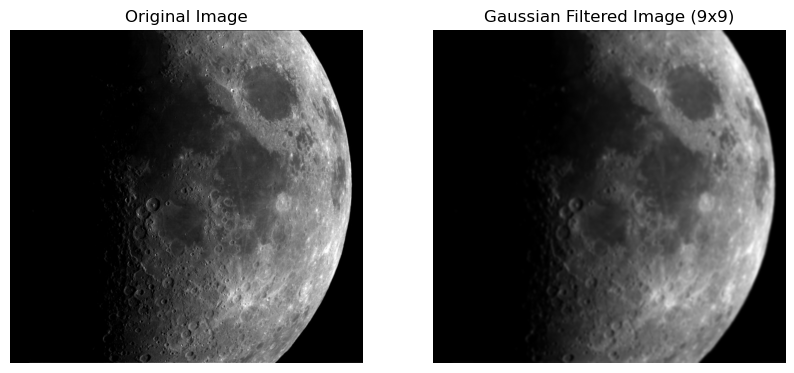

In [14]:
# Apply a box filter
Gaussian_filtered = cv.GaussianBlur(image, (9, 9), 0)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(Gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered Image (9x9)")
plt.axis("off")

plt.show()

Effect: The filtered image looks a bit blurry version of the original image with more natural blur.

(c) Laplacian filter

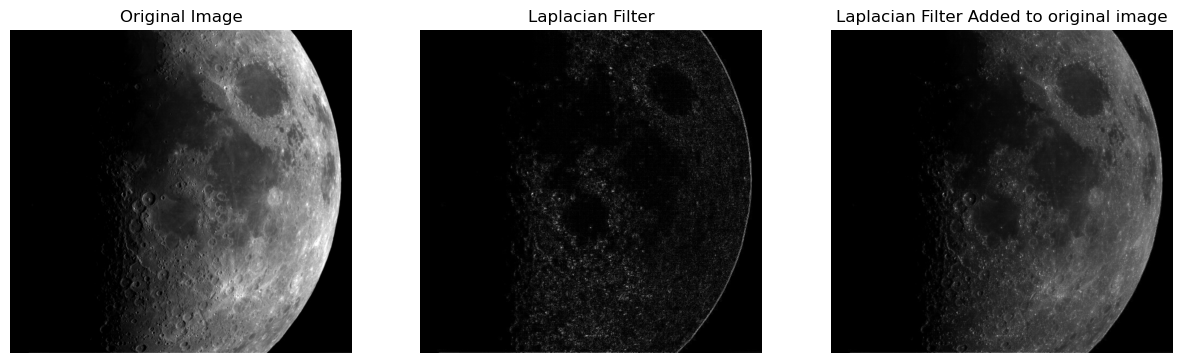

In [28]:
# Apply a Laplacian filter
laplacian = cv.Laplacian(image, cv.CV_64F)

# Convert results to absolute values
laplacian = cv.convertScaleAbs(laplacian)

# Plot the results
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian Filter")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image + 0.99*laplacian, cmap="gray")
plt.title("Laplacian Filter Added to original image")
plt.axis("off")

plt.show()

Effect: The Resulted Image is bit darker version of the original image but boundaries of craters are white and more visible. 

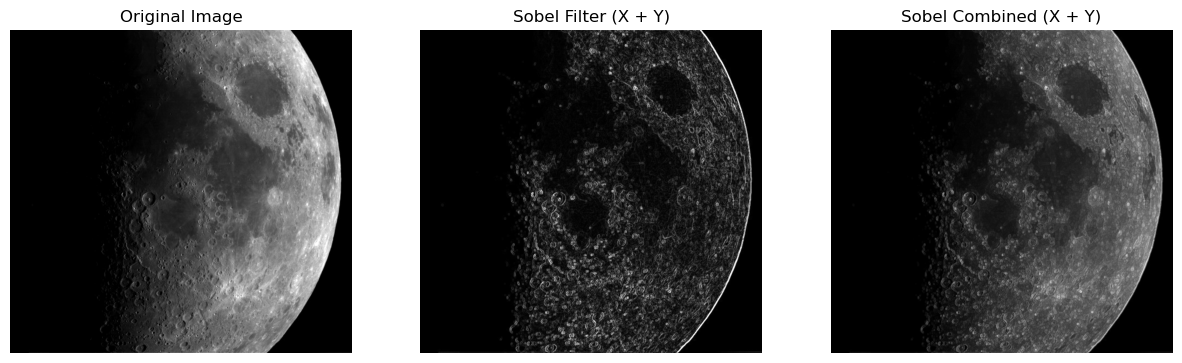

In [26]:
# Apply Sobel filters (X and Y directions)
sobel_x = cv.Sobel(image, cv.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv.Sobel(image, cv.CV_64F, dx=0, dy=1, ksize=3)

# Convert results to absolute values
sobel_x = cv.convertScaleAbs(sobel_x)
sobel_y = cv.convertScaleAbs(sobel_y)

# Combine Sobel X and Y
sobel_combined = cv.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Plot the results
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(sobel_combined, cmap="gray")
plt.title("Sobel Filter (X + Y)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image + 0.95*sobel_combined, cmap="gray")
plt.title("Sobel Combined (X + Y)")
plt.axis("off")

plt.show()

Effect: The Resulted Image is bit darker version of the original image but boundaries of craters are white and more visible. 

## (2) Viola-Jones Algorithm

### (a) Main Steps and Features of Viola-Jones Algorithm

**Main steps of Viola-Jones Algorithm**
| Step | Description |
|------|------------|
| **Haar Features** | Extract features from grayscale images using white/black rectangles. |
| **Integral Image** | Converts image into a **summed area table** for fast calculations. |
| **Adaboost Training** | Selects the most important Haar features for face detection. |
| **Cascade Classifier** | Uses a multi-stage rejection process for **fast** face detection. |


**Features of Viola-Jones Algorithm**
| **Feature** | **Description** |
|------------|----------------|
| **Haar-like Features** | Uses rectangular patterns to detect facial features. |
| **Integral Image** | Efficient pixel sum calculation for fast feature extraction. |
| **Adaboost** | Selects the most important features, improving accuracy. |
| **Cascade Classifier** | Multi-stage rejection process for fast detection. |
| **Real-time Processing** | Can detect faces in live video feeds efficiently. |
| **Grayscale Input** | Works on grayscale images, reducing computation time. |

### (b) List of all rectangle features that will be calculated by the VJ algorithm

The image: 

| 0 | 0 | 2 | 3 | 0 | 0 |
|---|---|---|---|---|---|
| 0 | 2 | 3 | 3 | 2 | 0 |
| 0 | 0 | 5 | 7 | 0 | 0 |
| 0 | 0 | 2 | 4 | 0 | 0 |
| 1 | 2 | 0 | 0 | 1 | 0 |
| 1 | 0 | 0 | 0 | 1 | 0 |

First we look at 2-rectangle features:

Horizontal rectangle feature can be size of $\{(w,h) | w \in \{1,2,3,4,5,6\} \text{ and } h \in \{2,4,6\}\}$  
Similarly Vertical rectangle features can be size of $\{(w,h) | w \in \{2,4,6\}\} \text{ and } h \in \{1,2,3,4,5,6\}$  
Hence the total number of features are: 
    $$
    2\times\sum_{w\in\{1,2,3,4,5,6\} \text{ and } h \in \{2,4,6\}} (6-w+1)(6-h+1)
    $$


In [8]:
count_2 = 0
for w in [1, 2, 3, 4, 5, 6]:
    for h in [2, 4, 6]:
        count_2 += 2*(6-w+1)*(6-h+1)
print(f"Total number of 2-rectangle features = {count_2}")

Total number of 2-rectangle features = 378


Now, 3-rectangle features:

Horizontal rectangle feature can be size of $\{(w,h) | w \in \{1,2,3,4,5,6\} \text{ and } h \in \{3,6\}\}$  
Similarly Vertical rectangle features can be size of $\{(w,h) | w \in \{3,6\}\} \text{ and } h \in \{1,2,3,4,5,6\}$  
Hence the total number of features are: 
    $$
    2\times\sum_{w\in\{1,2,3,4,5,6\} \text{ and } h \in \{3,6\}} (6-w+1)(6-h+1)
    $$


In [2]:
count_3 = 0
for w in [1, 2, 3, 4, 5, 6]:
    for h in [3,6]:
        count_3 += 2*(6-w+1)*(6-h+1)
print(f"Total number of 3-rectangle features = {count_3}")

Total number of 3-rectangle features = 210


Finally, 4-rectangle features:

4-rectangle feature can be size of $\{(w,h) | w=h \text{ and } w \in \{2,4,6\}\}$  
Hence the total number of features are: 
    $$
    \sum_{w=h \text{ and } w \in \{2,4,6\}} (6-w+1)(6-h+1)
    $$


In [ ]:
count_4 = 0
for w in [2, 4, 6]:
    count_4 += (6-w+1)*(6-w+1)
print(f"Total number of 4-rectangle features = {count_4}")

Total number of 4-rectangle features = 35


| Feature Type | Number of Features |
| ------------ | ------------------ |
| 2-rectangle  | 378|
| 3-rectangle  | 210|
| 4-rectangle  | 35|

Total number of features are 623

### (c) Computing the Integral Image

In [29]:
image = np.array([
    [0, 0, 2, 3, 0, 0],
    [0, 2, 3, 3, 2, 0],
    [0, 0, 5, 7, 0, 0],
    [0, 0, 2, 4, 0, 0],
    [1, 2, 0, 0, 1, 0],
    [1, 0, 0, 0, 1, 0]
])

In [30]:
# Get image dimensions
h, w = image.shape

# Initialize integral image with zeros
integral_image = np.zeros((h, w), dtype=np.int32)

# Compute the integral image
for i in range(h):
    for j in range(w):
        integral_image[i, j] = image[i, j]
        if i > 0:
            integral_image[i, j] += integral_image[i-1, j]
        if j > 0:
            integral_image[i, j] += integral_image[i, j-1]
        if i > 0 and j > 0:
            integral_image[i, j] -= integral_image[i-1, j-1]

print(f"Integral Image: \n{integral_image}")

Integral Image: 
[[ 0  0  2  5  5  5]
 [ 0  2  7 13 15 15]
 [ 0  2 12 25 27 27]
 [ 0  2 14 31 33 33]
 [ 1  5 17 34 37 37]
 [ 2  6 18 35 39 39]]


### The comment on the figure-3

<img src="./figure-3.png" alt="Alt text" width="450">

We want to compute the sum of pixels at location **D**. The **Integral Image** at coordinate **4** contains the cumulative sum of all pixels from regions **A**, **B**, **C**, and **D**. However, when we subtract the integral values at coordinates **2** and **3**, the pixels from region **A** are removed twice. To correct this, we add back the integral value at coordinate **1**, ensuring that the sum of pixels at location **D** is accurately computed.

### (d) Computing values of rectangle features

Assuming `(x,y)` is the top-left corner of the  kernel.

In [ ]:
def feature(integral_image, x, y, kernel, w, h):
    integral_image = np.pad(integral_image, pad_width=1)
    # Horizontal 2-rectangle feature
    if kernel == 'h-2-rectangle':
        # Coordinates of All Four Points in the Black and White Regions Used in Figure-3
        white_region_point_1 = (x, y)
        white_region_point_2 = (x, y+w//2)
        white_region_point_3 = (x+h, y)
        white_region_point_4 = (x+h, y+w//2)

        gray_region_point_1 = (x, y+w//2)
        gray_region_point_2 = (x, y+w)
        gray_region_point_3 = (x+h, y+w//2)
        gray_region_point_4 = (x+h, y+w)
        
        # Computing sums of pixels of white and black regions using the comment in Figure-3
        white_pixels_sum = integral_image[white_region_point_4] \
                         + integral_image[white_region_point_1] \
                         - (integral_image[white_region_point_2] + integral_image[white_region_point_3])

        gray_pixels_sum = integral_image[gray_region_point_4] \
                         + integral_image[gray_region_point_1] \
                         - (integral_image[gray_region_point_2] + integral_image[gray_region_point_3])
        
        return white_pixels_sum - gray_pixels_sum

    # Vertical 2-rectangle feature
    elif kernel == 'v-2-rectangle':
        # Coordinates of All Four Points in the Black and White Regions Used in Figure-3
        gray_region_point_1 = (x, y)
        gray_region_point_2 = (x, y+w)
        gray_region_point_3 = (x+h//2, y)
        gray_region_point_4 = (x+h//2, y+w)

        white_region_point_1 = (x+h//2, y)
        white_region_point_2 = (x+h//2, y+w)
        white_region_point_3 = (x+h, y)
        white_region_point_4 = (x+h, y+w)
        
        # Computing sums of pixels of white and black regions using the comment in Figure-3
        white_pixels_sum = integral_image[white_region_point_4] \
                         + integral_image[white_region_point_1] \
                         - (integral_image[white_region_point_2] + integral_image[white_region_point_3])

        gray_pixels_sum = integral_image[gray_region_point_4] \
                         + integral_image[gray_region_point_1] \
                         - (integral_image[gray_region_point_2] + integral_image[gray_region_point_3])

        return white_pixels_sum - gray_pixels_sum   

    # Horizontal 3-rectangle feature
    elif kernel == 'h-3-rectangle':
        # Coordinates of All Four Points in the Black and White Regions Used in Figure-3
        white_region_point_1_1 = (x, y)
        white_region_point_1_2 = (x, y+w//3)
        white_region_point_1_3 = (x+h, y)
        white_region_point_1_4 = (x+h, y+w//3)

        white_region_point_2_1 = (x, y+2*w//3)
        white_region_point_2_2 = (x, y+w)
        white_region_point_2_3 = (x+h, y+2*w//3)
        white_region_point_2_4 = (x+h, y+w)

        gray_region_point_1 = (x, y+w//3)
        gray_region_point_2 = (x, y+2*w//3)
        gray_region_point_3 = (x+h, y+w//3)
        gray_region_point_4 = (x+h, y+2*w//3)

        # Computing sums of pixels of white and black regions using the comment in Figure-3
        white_pixels_sum_1 = integral_image[white_region_point_1_4] \
                         + integral_image[white_region_point_1_1] \
                         - (integral_image[white_region_point_1_2] + integral_image[white_region_point_1_3])
        white_pixels_sum_2 = integral_image[white_region_point_2_4] \
                         + integral_image[white_region_point_2_1] \
                         - (integral_image[white_region_point_2_2] + integral_image[white_region_point_2_3])

        gray_pixels_sum = integral_image[gray_region_point_4] \
                         + integral_image[gray_region_point_1] \
                         - (integral_image[gray_region_point_2] + integral_image[gray_region_point_3])
                         
        return white_pixels_sum_1 + white_pixels_sum_2 - gray_pixels_sum

    # Vertical 3-rectangle feature
    elif kernel == 'v-3-rectangle':
        # Coordinates of All Four Points in the Black and White Regions Used in Figure-3
        white_region_point_1_1 = (x, y)
        white_region_point_1_2 = (x, y+w)
        white_region_point_1_3 = (x+h//3, y)
        white_region_point_1_4 = (x+h//3, y+w)

        white_region_point_2_1 = (x+2*h//3, y)
        white_region_point_2_2 = (x+2*h//3, y+w)
        white_region_point_2_3 = (x+h, y)
        white_region_point_2_4 = (x+h, y+w)

        gray_region_point_1 = (x+h//3, y)
        gray_region_point_2 = (x+h//3, y+w)
        gray_region_point_3 = (x+2*h//3, y)
        gray_region_point_4 = (x+2*h//3, y+w)


        # Computing sums of pixels of white and black regions using the comment in Figure-3
        white_pixels_sum_1 = integral_image[white_region_point_1_4] \
                         + integral_image[white_region_point_1_1] \
                         - (integral_image[white_region_point_1_2] + integral_image[white_region_point_1_3])
        white_pixels_sum_2 = integral_image[white_region_point_2_4] \
                         + integral_image[white_region_point_2_1] \
                         - (integral_image[white_region_point_2_2] + integral_image[white_region_point_2_3])

        gray_pixels_sum = integral_image[gray_region_point_4] \
                         + integral_image[gray_region_point_1] \
                         - (integral_image[gray_region_point_2] + integral_image[gray_region_point_3])
                         
        return white_pixels_sum_1 + white_pixels_sum_2 - gray_pixels_sum

    # 4-rectangle feature
    elif kernel == '4-rectangle':
        # Coordinates of All Four Points in the Black and White Regions Used in Figure-3
        white_region_point_1_1 = (x, y)
        white_region_point_1_2 = (x, y+w//2)
        white_region_point_1_3 = (x+h//2, y)
        white_region_point_1_4 = (x+h//2, y+w//2)

        white_region_point_2_1 = (x+h//2, y+w//2)
        white_region_point_2_2 = (x+h//2, y+w)
        white_region_point_2_3 = (x+h, y+w//2)
        white_region_point_2_4 = (x+h, y+w)

        gray_region_point_1_1 = (x, y+w//2)
        gray_region_point_1_2 = (x, y+w)
        gray_region_point_1_3 = (x+h//2, y+w//2)
        gray_region_point_1_4 = (x+h//2, y+w)

        gray_region_point_2_1 = (x+h//2, y)
        gray_region_point_2_2 = (x+h//2, y+w//2)
        gray_region_point_2_3 = (x+h, y)
        gray_region_point_2_4 = (x+h, y+w//2)

        # Computing sums of pixels of white and black regions using the comment in Figure-3
        white_pixels_sum_1 = integral_image[white_region_point_1_4] \
                         + integral_image[white_region_point_1_1] \
                         - (integral_image[white_region_point_1_2] + integral_image[white_region_point_1_3])
        white_pixels_sum_2 = integral_image[white_region_point_2_4] \
                         + integral_image[white_region_point_2_1] \
                         - (integral_image[white_region_point_2_2] + integral_image[white_region_point_2_3])

        gray_pixels_sum_1 = integral_image[gray_region_point_1_4] \
                         + integral_image[gray_region_point_1_1] \
                         - (integral_image[gray_region_point_1_2] + integral_image[gray_region_point_1_3])
        gray_pixels_sum_2 = integral_image[gray_region_point_2_4] \
                         + integral_image[gray_region_point_2_1] \
                         - (integral_image[gray_region_point_2_2] + integral_image[gray_region_point_2_3])
        return white_pixels_sum_1 + white_pixels_sum_2 - gray_pixels_sum_1 - gray_pixels_sum_2

#### horizontal two-rectangle features

In [60]:
for h in [1, 2, 3, 4, 5, 6]:
    for w in [2, 4, 6]:
        f = np.zeros((6-h+1, 6-w+1), dtype=np.int32)
        for x in range(6-h+1):
            for y in range(6-w+1):
                f[x, y] = feature(integral_image, x, y, 'h-2-rectangle', w, h)
        print(f"width = {w} and height = {h}\nFeature:\n{f}\n")

width = 2 and height = 1
Feature:
[[ 0 -2 -1  3  0]
 [-2 -1  0  1  2]
 [ 0 -5 -2  7  0]
 [ 0 -2 -2  4  0]
 [-1  2  0 -1  1]
 [ 1  0  0 -1  1]]

width = 4 and height = 1
Feature:
[[ -5  -1   5]
 [ -4   0   4]
 [-12  -2  12]
 [ -6  -2   6]
 [  3   1  -1]
 [  1  -1  -1]]

width = 6 and height = 1
Feature:
[[-1]
 [ 0]
 [-2]
 [-2]
 [ 2]
 [ 0]]

width = 2 and height = 2
Feature:
[[-2 -3 -1  4  2]
 [-2 -6 -2  8  2]
 [ 0 -7 -4 11  0]
 [-1  0 -2  3  1]
 [ 0  2  0 -2  2]]

width = 4 and height = 2
Feature:
[[ -9  -1   9]
 [-16  -2  16]
 [-18  -4  18]
 [ -3  -1   5]
 [  4   0  -2]]

width = 6 and height = 2
Feature:
[[-1]
 [-2]
 [-4]
 [ 0]
 [ 2]]

width = 2 and height = 3
Feature:
[[-2 -8 -3 11  2]
 [-2 -8 -4 12  2]
 [-1 -5 -4 10  1]
 [ 0  0 -2  2  2]]

width = 4 and height = 3
Feature:
[[-21  -3  21]
 [-22  -4  22]
 [-15  -3  17]
 [ -2  -2   4]]

width = 6 and height = 3
Feature:
[[-3]
 [-4]
 [-2]
 [ 0]]

width = 2 and height = 4
Feature:
[[ -2 -10  -5  15   2]
 [ -3  -6  -4  11   3]
 [  0  -5  

#### vertical two-rectangle features

In [61]:
for h in [2, 4, 6]:
    for w in [1, 2, 3, 4, 5, 6]:
        f = np.zeros((6-h+1, 6-w+1), dtype=np.int32)
        for x in range(6-h+1):
            for y in range(6-w+1):
                f[x, y] = feature(integral_image, x, y, 'v-2-rectangle', w, h)
        print(f"width = {w} and height = {h}\nFeature:\n{f}\n")

width = 1 and height = 2
Feature:
[[ 0  2  1  0  2  0]
 [ 0 -2  2  4 -2  0]
 [ 0  0 -3 -3  0  0]
 [ 1  2 -2 -4  1  0]
 [ 0 -2  0  0  0  0]]

width = 2 and height = 2
Feature:
[[ 2  3  1  2  2]
 [-2  0  6  2 -2]
 [ 0 -3 -6 -3  0]
 [ 3  0 -6 -3  1]
 [-2 -2  0  0  0]]

width = 3 and height = 2
Feature:
[[ 3  3  3  2]
 [ 0  4  4  2]
 [-3 -6 -6 -3]
 [ 1 -4 -5 -3]
 [-2 -2  0  0]]

width = 4 and height = 2
Feature:
[[ 3  5  3]
 [ 4  2  4]
 [-6 -6 -6]
 [-3 -3 -5]
 [-2 -2  0]]

width = 5 and height = 2
Feature:
[[ 5  5]
 [ 2  2]
 [-6 -6]
 [-2 -3]
 [-2 -2]]

width = 6 and height = 2
Feature:
[[ 5]
 [ 2]
 [-6]
 [-2]
 [-2]]

width = 1 and height = 4
Feature:
[[  0  -2   2   5  -2   0]
 [  1   0  -6  -6  -1   0]
 [  2   2  -7 -11   2   0]]

width = 2 and height = 4
Feature:
[[ -2   0   7   3  -2]
 [  1  -6 -12  -7  -1]
 [  4  -5 -18  -9   2]]

width = 3 and height = 4
Feature:
[[  0   5   5   3]
 [ -5 -12 -13  -7]
 [ -3 -16 -16  -9]]

width = 4 and height = 4
Feature:
[[  5   3   5]
 [-11 -13 -13]


#### horizontal three-rectangle features

In [62]:
for h in [1, 2, 3, 4, 5, 6]:
    for w in [3, 6]:
        f = np.zeros((6-h+1, 6-w+1), dtype=np.int32)
        for x in range(6-h+1):
            for y in range(6-w+1):
                f[x, y] = feature(integral_image, x, y, 'h-3-rectangle', w, h)
        print(f"width = {w} and height = {h}\nFeature:\n{f}\n")

width = 3 and height = 1
Feature:
[[ 2  1 -1  3]
 [ 1  2  2  1]
 [ 5  2 -2  7]
 [ 2  2 -2  4]
 [-1  2  1 -1]
 [ 1  0  1 -1]]

width = 6 and height = 1
Feature:
[[ -5]
 [ -2]
 [-12]
 [ -6]
 [  4]
 [  2]]

width = 3 and height = 2
Feature:
[[ 3  3  1  4]
 [ 6  4  0  8]
 [ 7  4 -4 11]
 [ 1  4 -1  3]
 [ 0  2  2 -2]]

width = 6 and height = 2
Feature:
[[ -7]
 [-14]
 [-18]
 [ -2]
 [  6]]

width = 3 and height = 3
Feature:
[[ 8  5 -1 11]
 [ 8  6 -2 12]
 [ 6  6 -3 10]
 [ 2  4  0  2]]

width = 6 and height = 3
Feature:
[[-19]
 [-20]
 [-14]
 [  0]]

width = 3 and height = 4
Feature:
[[10  7 -3 15]
 [ 7  8 -1 11]
 [ 7  6 -2  9]]

width = 6 and height = 4
Feature:
[[-25]
 [-16]
 [-12]]

width = 3 and height = 5
Feature:
[[ 9  9 -2 14]
 [ 8  8  0 10]]

width = 6 and height = 5
Feature:
[[-21]
 [-14]]

width = 3 and height = 6
Feature:
[[10  9 -1 13]]

width = 6 and height = 6
Feature:
[[-19]]



#### vertical three-rectangle features

In [63]:
for h in [3, 6]:
    for w in [1, 2, 3, 4, 5, 6]:
        f = np.zeros((6-h+1, 6-w+1), dtype=np.int32)
        for x in range(6-h+1):
            for y in range(6-w+1):
                f[x, y] = feature(integral_image, x, y, 'v-3-rectangle', w, h)
        print(f"width = {w} and height = {h}\nFeature:\n{f}\n")

width = 1 and height = 3
Feature:
[[ 0 -2  4  7 -2  0]
 [ 0  2  0  0  2  0]
 [ 1  2  3  3  1  0]
 [ 0 -2  2  4  0  0]]

width = 2 and height = 3
Feature:
[[-2  2 11  5 -2]
 [ 2  2  0  2  2]
 [ 3  5  6  4  1]
 [-2  0  6  4  0]]

width = 3 and height = 3
Feature:
[[2 9 9 5]
 [2 2 2 2]
 [6 8 7 4]
 [0 4 6 4]]

width = 4 and height = 3
Feature:
[[9 7 9]
 [2 4 2]
 [9 9 7]
 [4 4 6]]

width = 5 and height = 3
Feature:
[[ 7  7]
 [ 4  4]
 [10  9]
 [ 4  4]]

width = 6 and height = 3
Feature:
[[ 7]
 [ 4]
 [10]
 [ 4]]

width = 1 and height = 6
Feature:
[[ 2  4 -2 -5  4  0]]

width = 2 and height = 6
Feature:
[[ 6  2 -7 -1  4]]

width = 3 and height = 6
Feature:
[[ 4 -3 -3 -1]]

width = 4 and height = 6
Feature:
[[-1  1 -3]]

width = 5 and height = 6
Feature:
[[3 1]]

width = 6 and height = 6
Feature:
[[3]]



#### four-rectangle features

In [64]:
for h in [2, 4, 6]:
    w = h
    f = np.zeros((6-h+1, 6-w+1), dtype=np.int32)
    for x in range(6-h+1):
        for y in range(6-w+1):
            f[x, y] = feature(integral_image, x, y, '4-rectangle', w, h)
    print(f"width = {w} and height = {h}\nFeature:\n{f}\n")

width = 2 and height = 2
Feature:
[[ 2 -1 -1  2 -2]
 [-2  4  2 -6  2]
 [ 0 -3  0  3  0]
 [ 1 -4 -2  5 -1]
 [-2  2  0  0  0]]

width = 4 and height = 4
Feature:
[[  9   3  -9]
 [-13  -1  11]
 [-22  -4  20]]

width = 6 and height = 6
Feature:
[[-3]]



## (3) Exercises from the book by Gonzalez and Woods

### (3.23) (a) Show that the Gaussian kernel, $G(s, t)$ is separable.

The **Gaussian kernel** is given by:

$$
G(s,t) = \mu e^{-\frac{s^2+t^2}{2\sigma^2}}
$$

We can factorize it as:

$$
G(s,t) = \left(\sqrt{\mu} e^{-\frac{s^2}{2\sigma^2}}\right) \times \left(\sqrt{\mu} e^{-\frac{t^2}{2\sigma^2}}\right)
$$

which can be rewritten as:

$$
G(s,t) = G(s) \times G(t)
$$

where  

$$
G(s) = \sqrt{\mu} e^{-\frac{s^2}{2\sigma^2}}, \quad G(t) = \sqrt{\mu} e^{-\frac{t^2}{2\sigma^2}}
$$

Thus, the **Gaussian kernel is separable**, meaning it can be expressed as the product of two independent 1D Gaussian functions.

### (b) Because G is separable and circularly symmetric, it can be expressed in the form $G = vv^T$ . Assume that the kernel form in Eq. (3-46) is used, and that the function is sampled to yield an $m\times m$ kernel. What is $v$ in this case?

We are given a **separable and circularly symmetric** Gaussian kernel $G$, which can be expressed in the form:

$$
G = v v^T
$$

From the **answer (a)** above

$$
v = G(s) = \sqrt{K} e^{-\frac{s^2}{2\sigma^2}}
$$

Similarly, the corresponding 1D vector $v$, which generates the **2D kernel** via $G = v v^T$, takes the form:

$$
v_i = \sqrt{K} e^{-\frac{x_i^2}{2\sigma^2}}
$$

where $x_i$ represents the discrete spatial coordinates sampled from the kernel. If the kernel is of size $m \times m$, these points typically range from:

$$
x_i \in \left\{ -\frac{m-1}{2}, \dots, 0, \dots, \frac{m-1}{2} \right\}
$$

Thus, the 1D vector $v$ is:

$$
v_i = \sqrt{K} e^{-\frac{x_i^2}{2\sigma^2}}, \quad i = 1, 2, \dots, m
$$

where $x_i$ represents the sampled points along one dimension.

### (3.24) Show that the product of a column vector with a row vector is equivalent to the 2-D convolution of the two vectors. The vectors do not have to be of the same length.

Assume a column vector $ v $ of size $ m \times 1 $ and a row vector $ h $ of size $ 1 \times n $:

$$
v =
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_m
\end{bmatrix}
\quad \text{and} \quad
h =
\begin{bmatrix}
h_1 & h_2 & \dots & h_n
\end{bmatrix}
$$

The **product** $ v \times h $ is given by:

$$
G = v h
$$

which results in an $ m \times n $ matrix:

$$
G =
\begin{bmatrix}
v_1 h_1 & v_1 h_2 & \dots & v_1 h_n \\
v_2 h_1 & v_2 h_2 & \dots & v_2 h_n \\
\vdots & \vdots & \ddots & \vdots \\
v_m h_1 & v_m h_2 & \dots & v_m h_n
\end{bmatrix}
$$

Each element of $ G $ is computed as: $G(i, j) = v_i h_j$

Now the convolution between these two vector is equals to: 

$$
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_m
\end{bmatrix} * 

\begin{bmatrix}
h_1 & h_2 & \dots & h_n
\end{bmatrix}
 = 
\begin{bmatrix}
v_m \\
v_{m-1} \\
\vdots \\
v_1
\end{bmatrix}
\circledast
\begin{bmatrix}
0 & 0 & \dots & 0\\
0 & 0 & \dots & 0\\
\vdots & \vdots & \dots & \vdots\\
h_1 & h_2 & \dots & h_n\\
\vdots & \vdots & \dots & \vdots\\
0 & 0 & \dots & 0\\
0 & 0 & \dots & 0\\
\end{bmatrix}_{(2m-1)\times n}
$$

After applying the Correlation, we get:
$$
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_m
\end{bmatrix} * 

\begin{bmatrix}
h_1 & h_2 & \dots & h_n
\end{bmatrix}
 = 
\begin{bmatrix}
v_1 h_1 & v_1 h_2 & \dots & v_1 h_n \\
v_2 h_1 & v_2 h_2 & \dots & v_2 h_n \\
\vdots & \vdots & \ddots & \vdots \\
v_m h_1 & v_m h_2 & \dots & v_m h_n
\end{bmatrix}
$$

Hence, $vh^T=v\circledast h$

### (3.46) A manufacturing company purchased an imaging system whose function is to either smooth or sharpen images. The results of using the system on the manufacturing floor have been poor, and the plant manager suspects that the system is not smoothing and sharpening images the way it should. You are hired as a consultant to determine if the system is performing these functions properly. How would you determine if the system is working correctly?

**Expected Behavior of Smoothing and Sharpening Filters**
   - **Smoothing Filters:** Typically, smoothing filters are implemented using kernels whose coefficients sum to **1**. These filters preserve the overall brightness while reducing high-frequency components (edges and noise).
   - **Sharpening Filters:** Sharpening filters often have kernels whose coefficients sum to **0**. These filters enhance edges by emphasizing high-frequency components.

If the system is not working correctly, then maybe there is something wrong in the formulation of kernels. According to above points I will check the filters on test image to determine the flaw in the system.